In [1]:
import sys
sys.path.append('../')
from app.dag_solver import solve_DAG, solution_pipe
import app.dag_former as dag_former
from app.visualiser import plotgraph
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import math
import seaborn as sns
import matplotlib
%matplotlib inline
import functools
import collections
import networkx
import json
import app.pathfinder as pathfinder
wob = {"totaltime": 39155.806833199604, "sol": {"M": [17, 18, 29, 55, 31, 46, 60, 22], "K": [0], "R": [17], "S": [17, 18, 29, 55, 31, 46, 60, 22]}, "graph": {"S_5": {"edge_w": {"5": 32169}, "children": ["M_5"], "node_w": 377.55689062172706}, "M_2": {"edge_w": {"0": 51}, "children": ["R_0"], "node_w": 4.000186920166016, "parents": "S_2"}, "S_7": {"edge_w": {"7": 32169}, "children": ["M_7"], "node_w": 306.3734567412469}, "M_3": {"edge_w": {"0": 51}, "children": ["R_0"], "node_w": 4.000186920166016, "parents": "S_3"}, "S_0": {"edge_w": {"0": 32169}, "children": ["M_0"], "node_w": 272.32165952614434}, "R_0": {"edge_w": {"0": 137}, "children": ["K_0"], "node_w": 5.000591278076172, "parents": ["M_0", "M_1", "M_2", "M_3", "M_4", "M_5", "M_6", "M_7"]}, "M_7": {"edge_w": {"0": 51}, "children": ["R_0"], "node_w": 4.000186920166016, "parents": "S_7"}, "S_2": {"edge_w": {"2": 32169}, "children": ["M_2"], "node_w": 302.62094708337423}, "K_0": {"edge_w": {}, "children": [], "node_w": 0, "parents": ["R_0"]}, "M_4": {"edge_w": {"0": 51}, "children": ["R_0"], "node_w": 4.000425338745117, "parents": "S_4"}, "S_1": {"edge_w": {"1": 32169}, "children": ["M_1"], "node_w": 308.24590348565437}, "S_4": {"edge_w": {"4": 32169}, "children": ["M_4"], "node_w": 316.5645578123449}, "M_5": {"edge_w": {"0": 51}, "children": ["R_0"], "node_w": 5.000114440917969, "parents": "S_5"}, "S_3": {"edge_w": {"3": 32169}, "children": ["M_3"], "node_w": 339.3442580838602}, "M_0": {"edge_w": {"0": 51}, "children": ["R_0"], "node_w": 5.000114440917969, "parents": "S_0"}, "S_6": {"edge_w": {"6": 32169}, "children": ["M_6"], "node_w": 294.31580635065535}, "M_1": {"edge_w": {"0": 51}, "children": ["R_0"], "node_w": 4.000425338745117, "parents": "S_1"}, "M_6": {"edge_w": {"0": 51}, "children": ["R_0"], "node_w": 4.000186920166016, "parents": "S_6"}}, "job": "jjlong@mit.educr0dz", "px": {"0": 1, "17": 0.02, "64": 0.04, "58": 0.04, "56": 0.04, "29": 0.04, "55": 0.04, "46": 0.03, "22": 0.04, "61": 0.04, "63": 0.04, "21": 0.04, "18": 0.04, "31": 0.02, "60": 0.04}, "bw": {"40": {"31": 56.65, "64": 92.61, "58": 58.47, "56": 76.3, "39": 80.61, "37": 74.51, "22": 75.62, "29": 93.7, "15": 70.48, "41": 106.24, "32": 88.3, "18": 74.48, "21": 57.73, "60": 70.48, "0": 82.9, "40": 0.0, "95": 38.77, "17": 74.48, "68": 37.55, "55": 59.69, "46": 75.98, "49": 75.81, "53": 61.7, "43": 17.85, "61": 88.3, "44": 74.9, "96": 74.53}, "39": {"31": 53.63, "64": 35.66, "58": 55.45, "56": 53.75, "39": 0.0, "40": 17.83, "22": 17.83, "15": 19.7, "41": 85.49, "32": 35.9, "18": 18.08, "49": 53.73, "60": 53.98, "0": 54.43, "37": 17.83, "95": 35.75, "61": 54.87, "17": 35.9, "68": 37.53, "55": 53.82, "46": 36.16, "21": 35.66, "53": 54.42, "43": 17.83, "29": 35.91, "44": 71.88, "96": 53.79}, "64": {"64": 0.0}, "58": {"40": 107.55, "31": 71.56, "64": 89.69, "58": 0.0, "56": 17.83, "39": 98.48, "22": 89.69, "55": 77.55, "61": 72.7, "41": 103.32, "95": 56.63, "18": 89.38, "49": 93.67, "60": 88.34, "0": 73.39, "37": 71.58, "32": 53.73, "17": 89.38, "68": 35.8, "15": 35.9, "46": 71.57, "21": 75.6, "53": 72.25, "43": 35.71, "29": 107.77, "44": 89.8, "96": 71.62}, "56": {"40": 89.73, "31": 53.73, "64": 71.87, "58": 58.51, "56": 0.0, "39": 80.65, "22": 71.87, "55": 59.73, "61": 54.87, "41": 85.5, "95": 38.8, "18": 71.56, "49": 75.85, "60": 70.51, "0": 55.56, "37": 53.75, "32": 35.91, "17": 71.56, "68": 17.98, "15": 18.08, "46": 53.75, "21": 57.77, "53": 54.42, "43": 17.88, "29": 89.95, "44": 71.98, "96": 53.79}, "29": {"39": 56.92, "40": 57.75, "31": 20.92, "64": 56.88, "58": 77.51, "56": 35.96, "29": 0.0, "22": 39.89, "15": 17.83, "41": 70.51, "95": 57.81, "18": 38.75, "21": 36.16, "60": 18.08, "0": 18.52, "37": 38.78, "32": 35.65, "17": 18.08, "68": 31.71, "55": 36.0, "46": 53.49, "49": 53.82, "53": 53.88, "43": 53.84, "61": 35.9, "44": 39.17, "96": 38.8}, "22": {"39": 59.76, "31": 35.8, "64": 17.83, "58": 37.62, "56": 53.59, "29": 18.08, "22": 0.0, "15": 35.9, "41": 85.33, "37": 53.59, "32": 35.74, "18": 17.92, "49": 35.9, "60": 36.16, "0": 36.6, "40": 17.86, "95": 17.92, "17": 35.74, "68": 37.56, "55": 38.84, "46": 36.0, "21": 17.83, "53": 40.85, "43": 17.86, "61": 53.98, "44": 54.05, "96": 53.63}, "69": {"39": 74.8, "31": 38.8, "22": 57.77, "64": 71.62, "58": 76.3, "56": 53.5, "29": 17.88, "37": 53.5, "69": 0.0, "15": 17.83, "55": 53.88, "41": 85.24, "95": 56.6, "18": 19.7, "21": 18.52, "60": 35.96, "0": 36.4, "40": 17.83, "32": 35.66, "17": 35.96, "68": 49.59, "61": 53.79, "46": 36.76, "49": 36.6, "53": 44.76, "43": 35.67, "44": 17.83, "96": 53.54}, "15": {"39": 92.32, "40": 71.65, "17": 53.48, "64": 53.79, "58": 91.41, "56": 35.67, "29": 71.87, "22": 53.79, "55": 71.4, "61": 36.79, "41": 67.42, "95": 71.71, "18": 53.48, "49": 58.64, "60": 71.56, "0": 61.9, "37": 35.67, "32": 17.83, "31": 35.65, "68": 53.65, "15": 0.0, "46": 35.67, "21": 53.51, "53": 36.34, "43": 53.5, "44": 53.9, "96": 35.71}, "41": {"61": 17.92, "41": 0.0}, "95": {"40": 54.71, "17": 35.71, "64": 53.84, "58": 19.7, "56": 37.53, "39": 41.85, "22": 36.85, "29": 54.93, "15": 31.71, "41": 67.47, "32": 49.54, "18": 35.71, "21": 18.96, "60": 31.71, "0": 44.13, "37": 35.74, "95": 0.0, "31": 17.88, "68": 40.63, "55": 20.92, "46": 37.21, "49": 37.04, "53": 22.93, "43": 53.57, "61": 49.53, "44": 36.13, "96": 35.76}, "18": {"40": 71.65, "31": 35.65, "64": 53.79, "58": 91.41, "56": 35.67, "39": 56.67, "22": 53.79, "29": 71.87, "15": 17.98, "41": 67.42, "95": 71.71, "18": 0.0, "49": 53.57, "60": 35.9, "0": 40.76, "37": 35.67, "32": 17.83, "17": 17.83, "68": 53.65, "55": 35.74, "46": 18.08, "21": 35.9, "53": 36.34, "43": 53.5, "61": 36.79, "44": 53.9, "96": 35.71}, "17": {"31": 63.69, "64": 54.51, "58": 76.39, "56": 17.88, "39": 38.84, "40": 56.67, "22": 54.51, "29": 72.59, "15": 35.96, "41": 68.14, "95": 56.69, "18": 56.92, "21": 18.08, "60": 18.08, "0": 22.93, "37": 56.67, "32": 45.86, "17": 0.0, "68": 35.86, "55": 17.92, "46": 35.74, "49": 35.74, "53": 35.8, "43": 35.76, "61": 35.9, "44": 81.93, "96": 36.44}, "60": {"61": 17.83, "60": 0.0}, "0": {"39": 97.42, "40": 76.75, "17": 58.58, "64": 58.89, "58": 96.52, "56": 40.78, "29": 76.97, "22": 58.89, "55": 76.5, "15": 58.86, "41": 72.52, "95": 76.81, "18": 58.58, "49": 63.75, "60": 76.66, "0": 0.0, "37": 40.78, "32": 22.93, "31": 40.76, "68": 58.76, "61": 41.9, "46": 40.77, "21": 58.62, "53": 41.45, "43": 58.6, "44": 59.0, "96": 40.81}, "37": {"40": 93.45, "31": 56.63, "64": 92.59, "58": 58.45, "56": 76.28, "39": 80.59, "22": 75.6, "29": 93.67, "15": 58.55, "41": 106.22, "32": 76.38, "18": 74.46, "49": 35.92, "60": 70.46, "0": 82.88, "37": 0.0, "95": 38.75, "17": 74.46, "68": 37.53, "55": 59.67, "46": 36.08, "21": 17.84, "53": 44.08, "43": 17.83, "61": 88.28, "44": 74.87, "96": 74.51}, "32": {"39": 74.49, "40": 53.82, "17": 35.65, "64": 35.96, "58": 73.58, "56": 17.85, "29": 54.04, "22": 35.96, "55": 53.57, "15": 35.93, "41": 49.59, "95": 53.88, "18": 35.65, "49": 40.81, "60": 53.73, "0": 44.07, "37": 17.85, "32": 0.0, "31": 17.83, "68": 35.83, "61": 18.96, "46": 17.84, "21": 35.68, "53": 18.52, "43": 35.67, "44": 36.07, "96": 17.88}, "31": {"39": 56.67, "31": 0.0, "64": 35.96, "58": 56.59, "56": 35.71, "29": 37.04, "40": 36.82, "22": 18.96, "15": 35.8, "41": 49.59, "95": 36.88, "18": 17.83, "21": 35.7, "60": 35.9, "0": 26.25, "37": 17.86, "32": 35.65, "17": 17.83, "68": 53.69, "55": 35.74, "46": 35.9, "49": 40.81, "53": 53.63, "43": 35.69, "61": 53.73, "44": 18.24, "96": 17.88}, "68": {"68": 0.0}, "55": {"29": 54.68, "64": 36.6, "58": 74.22, "56": 36.4, "39": 20.92, "31": 72.4, "37": 38.75, "22": 36.6, "15": 40.63, "55": 0.0, "41": 50.22, "32": 56.83, "18": 39.0, "21": 54.42, "60": 17.88, "0": 40.71, "40": 38.75, "95": 54.51, "17": 56.83, "68": 19.7, "61": 35.71, "46": 17.83, "49": 17.83, "53": 17.88, "43": 38.75, "44": 90.64, "96": 18.52}, "46": {"46": 0.0}, "21": {"39": 133.03, "40": 112.36, "31": 76.37, "64": 94.5, "58": 132.13, "56": 76.39, "29": 112.58, "22": 94.5, "55": 112.11, "61": 77.51, "41": 108.13, "95": 112.42, "18": 94.19, "49": 18.08, "60": 112.27, "0": 102.61, "37": 76.39, "32": 58.54, "17": 94.19, "68": 94.37, "15": 40.71, "46": 18.24, "21": 0.0, "53": 26.25, "43": 94.21, "44": 94.61, "96": 76.42}, "44": {"44": 0.0}, "53": {"53": 0.0}, "43": {"40": 75.63, "17": 56.63, "64": 74.77, "58": 40.63, "56": 58.45, "39": 62.77, "22": 57.77, "29": 75.85, "15": 52.63, "41": 88.39, "32": 70.46, "18": 56.63, "21": 39.89, "60": 52.63, "0": 65.05, "37": 56.66, "95": 20.92, "31": 38.8, "68": 19.7, "55": 41.85, "46": 58.13, "49": 57.97, "53": 43.86, "43": 0.0, "61": 70.46, "44": 57.05, "96": 56.69}, "61": {"61": 0.0}, "49": {"49": 0.0}, "96": {"39": 77.84, "31": 53.88, "64": 18.08, "58": 55.7, "56": 17.88, "29": 36.16, "22": 18.08, "55": 56.92, "15": 35.96, "41": 31.71, "37": 71.64, "32": 53.79, "18": 36.0, "49": 22.93, "60": 54.24, "0": 54.68, "40": 35.94, "95": 36.0, "17": 53.82, "68": 35.86, "61": 49.63, "46": 54.08, "21": 35.9, "53": 58.93, "43": 35.76, "44": 72.12, "96": 0.0}}, "code": "class SenseReduce:\n    def __init__(self):\n        self.sensenodes = [17, 18, 29, 55, 31, 46, 60, 22]\n        self.mapnodes = [17, 18, 29, 55, 31, 46, 60, 22]\n        self.reducenodes = [17]\n        self.l=512\n    def sampler(self,node):\n        acc = yield from node.testaccel(512)\n        return (node.ID,acc)\n    def mapper(self,node,d):\n        fts = np.fft(d[1]['x'])\n        c = lambda d: (d.real,d.imag)\n        yield(0,(d[0],c(fts[6])))\n    def reducer(self,node,k,vs):\n        ws = [complex(*i[1]) for i in vs]\n        G = np.spectral_mat(ws)\n        eig = np.pagerank(G)\n        c = lambda d: (round(d.real,2),round(d.imag,2))\n        ms = [(vs[idx][0],c(el)) for idx,el in enumerate(eig)]\n        yield(k,ms)\n"}
reduce_dict = {"fdd_single":"""
    def sampler(self,node):
        acc = yield from node.testaccel(512)
        return (node.ID,acc)
    def mapper(self,node,d):
        fts = np.fft(d[1]['x'])
        c = lambda d: (d.real,d.imag)
        yield(0,(d[0],c(fts[6])))
    def reducer(self,node,k,vs):
        ws = [complex(*i[1]) for i in vs]
        G = np.spectral_mat(ws)
        eig = np.pagerank(G)
        c = lambda d: (d.real,d.imag)
        ms = [(vs[idx][0],c(el)) for idx,el in enumerate(eig)]
        yield(k,ms)""","dfdd":"""
    def sampler(self,node):
        acc = yield from node.testaccel(512)
        return (node.ID,acc)
    def mapper(self,node,d):
        fts = np.fft(d[1]['x'])
        c = lambda d: (d.real,d.imag)
        k = hash(node.ID)%4
        yield(k,(d[0],c(fts[6])))
    def reducer(self,node,k,vs):
        ws = [complex(*i[1]) for i in vs]
        G = np.spectral_mat(ws)
        eig = np.pagerank(G)
        c = lambda d: (d.real,d.imag)
        ms = [(vs[idx][0],c(el)) for idx,el in enumerate(eig)]
        yield(k,ms)"""}
def get_code(k, node):
    confe = """class SenseReduce:
    def __init__(self):
        self.sensenodes = [[17],[18],[29],[55],[31],[46],[60],[22]]
        self.mapnodes = [[17],[18],[29],[55],[31],[46],[60],[22]]
        self.reducenodes = {}
        self.l = 512""".format(node)
    print('code: ',confe)
    return confe+reduce_dict[k]
def solver(code, bw, processors):
    graph = dag_former.generate_weighted_graph(code)
    constraints = dag_former.generate_constraints(code, graph)
    solution,time = solution_pipe(graph, constraints, processors, bw)
    return {'sol':solution,'totaltime':time}
def sing_inter(kv):
    return {int(k):v for k,v in kv.items()}
def inter(bw):
    return {int(k):sing_inter(v) for k,v in bw.items()}
sing_red = functools.partial(get_code, 'fdd_single')

In [21]:
options = [[0],[17],[18],[29],[55],[31],[46],[60],[22]]
solutions = {k[0]: solver(sing_red([k]),inter(wob['bw']),sing_inter(wob['px'])) for k in options}

code:  class SenseReduce:
    def __init__(self):
        self.sensenodes = [[17],[18],[29],[55],[31],[46],[60],[22]]
        self.mapnodes = [[17],[18],[29],[55],[31],[46],[60],[22]]
        self.reducenodes = [[0]]
        self.l = 512
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! 

code:  class SenseReduce:
    def __init__(self):
        self.sensenodes = [[17],[18],[29],[55],[31],[46],[60],[22]]
        self.mapnodes = [[17],[18],[29],[55],[31],[46],[60],[22]]
        self.reducenodes = [[55]]
        self.l = 512
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!!

code:  class SenseReduce:
    def __init__(self):
        self.sensenodes = [[17],[18],[29],[55],[31],[46],[60],[22]]
        self.mapnodes = [[17],[18],[29],[55],[31],[46],[60],[22]]
        self.reducenodes = [[22]]
        self.l = 512
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!!

In [12]:
ts = [(k, v['totaltime']/1000) for k,v in solutions.items()]
ts = sorted(ts, key=lambda v:v[1])
t_corr = pd.DataFrame(ts,columns=['reduce location', 'total time'])

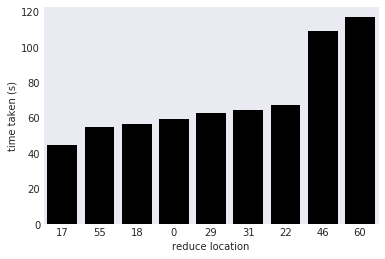

In [13]:
sns.set_style('dark')
ax = sns.barplot(x = 'reduce location', y= 'total time',data=t_corr, order=[t[0] for t in ts], palette = ['k' for i in ts])
ax.set_ylabel('time taken (s)')
fig = ax.get_figure()
fig.savefig('reduce location')

In [29]:
mul_red = functools.partial(get_code, 'dfdd')
options = [ [[0]] , [[0],[17]], [[17,55]] ]
solutions = {json.dumps(k): solver(mul_red(k),inter(wob['bw']),sing_inter(wob['px'])) for k in options}

code:  class SenseReduce:
    def __init__(self):
        self.sensenodes = [[17],[18],[29],[55],[31],[46],[60],[22]]
        self.mapnodes = [[17],[18],[29],[55],[31],[46],[60],[22]]
        self.reducenodes = [[0]]
        self.l = 512
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! <module 'app.np' from '../app/np.py'>
opening:  ../app/192.168.123.99.json
called emulator!! 

In [30]:
solutions

{'[[0], [17]]': {'sol': {'K': [0],
   'M': [17, 18, 29, 55, 31, 46, 60, 22],
   'R': [0, 17],
   'S': [17, 18, 29, 55, 31, 46, 60, 22]},
  'totaltime': 39533.09646829335},
 '[[0]]': {'sol': {'K': [0],
   'M': [17, 18, 29, 55, 31, 46, 60, 22],
   'R': [0],
   'S': [17, 18, 29, 55, 31, 46, 60, 22]},
  'totaltime': 59692.91591684476},
 '[[17, 55]]': {'sol': {'K': [0],
   'M': [17, 18, 29, 55, 31, 46, 60, 22],
   'R': [17],
   'S': [17, 18, 29, 55, 31, 46, 60, 22]},
  'totaltime': 45694.21798275953}}

In [32]:
def centrality(graph):
    return networkx.closeness_centrality(pathfinder.network_graph(wob['bw']), distance='weight')
def mul_coder(nodes, reduce_nodes = None):
    def pruned(n):
        central_d = centrality(wob['bw'])
        top6_vals = sorted(central_d.values(), reverse=True)[0:6]
        top6_nodes = [int(k) for k,v in central_d.items() if v in top6_vals] +[0]
        return [top6_nodes]*4
    if not reduce_nodes:
        reduce_nodes = pruned(nodes)
    fmatted = [[k] for k in nodes]
    confe = """class SenseReduce:
    def __init__(self):
        self.sensenodes = {}
        self.mapnodes = {}
        self.reducenodes = {}
        self.l = 512""".format(fmatted, fmatted, reduce_nodes)
    print('code: ',confe)
    return confe+reduce_dict['dfdd']

In [33]:
mul_coder([17,18,55])

code:  class SenseReduce:
    def __init__(self):
        self.sensenodes = [[17], [18], [55]]
        self.mapnodes = [[17], [18], [55]]
        self.reducenodes = [[22, 32, 55, 31, 29, 95, 0], [22, 32, 55, 31, 29, 95, 0], [22, 32, 55, 31, 29, 95, 0], [22, 32, 55, 31, 29, 95, 0]]
        self.l = 512


"class SenseReduce:\n    def __init__(self):\n        self.sensenodes = [[17], [18], [55]]\n        self.mapnodes = [[17], [18], [55]]\n        self.reducenodes = [[22, 32, 55, 31, 29, 95, 0], [22, 32, 55, 31, 29, 95, 0], [22, 32, 55, 31, 29, 95, 0], [22, 32, 55, 31, 29, 95, 0]]\n        self.l = 512\n    def sampler(self,node):\n        acc = yield from node.testaccel(512)\n        return (node.ID,acc)\n    def mapper(self,node,d):\n        fts = np.fft(d[1]['x'])\n        c = lambda d: (d.real,d.imag)\n        k = hash(node.ID)%4\n        yield(k,(d[0],c(fts[6])))\n    def reducer(self,node,k,vs):\n        ws = [complex(*i[1]) for i in vs]\n        G = np.spectral_mat(ws)\n        eig = np.pagerank(G)\n        c = lambda d: (d.real,d.imag)\n        ms = [(vs[idx][0],c(el)) for idx,el in enumerate(eig)]\n        yield(k,ms)"